# Otsu binarising/auto-labelling

In [20]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [21]:
# Random image
img = cv2.imread('data/otsu/thermal/greyscale/192.168.88.175_02_20210714123323768.jpg',0)

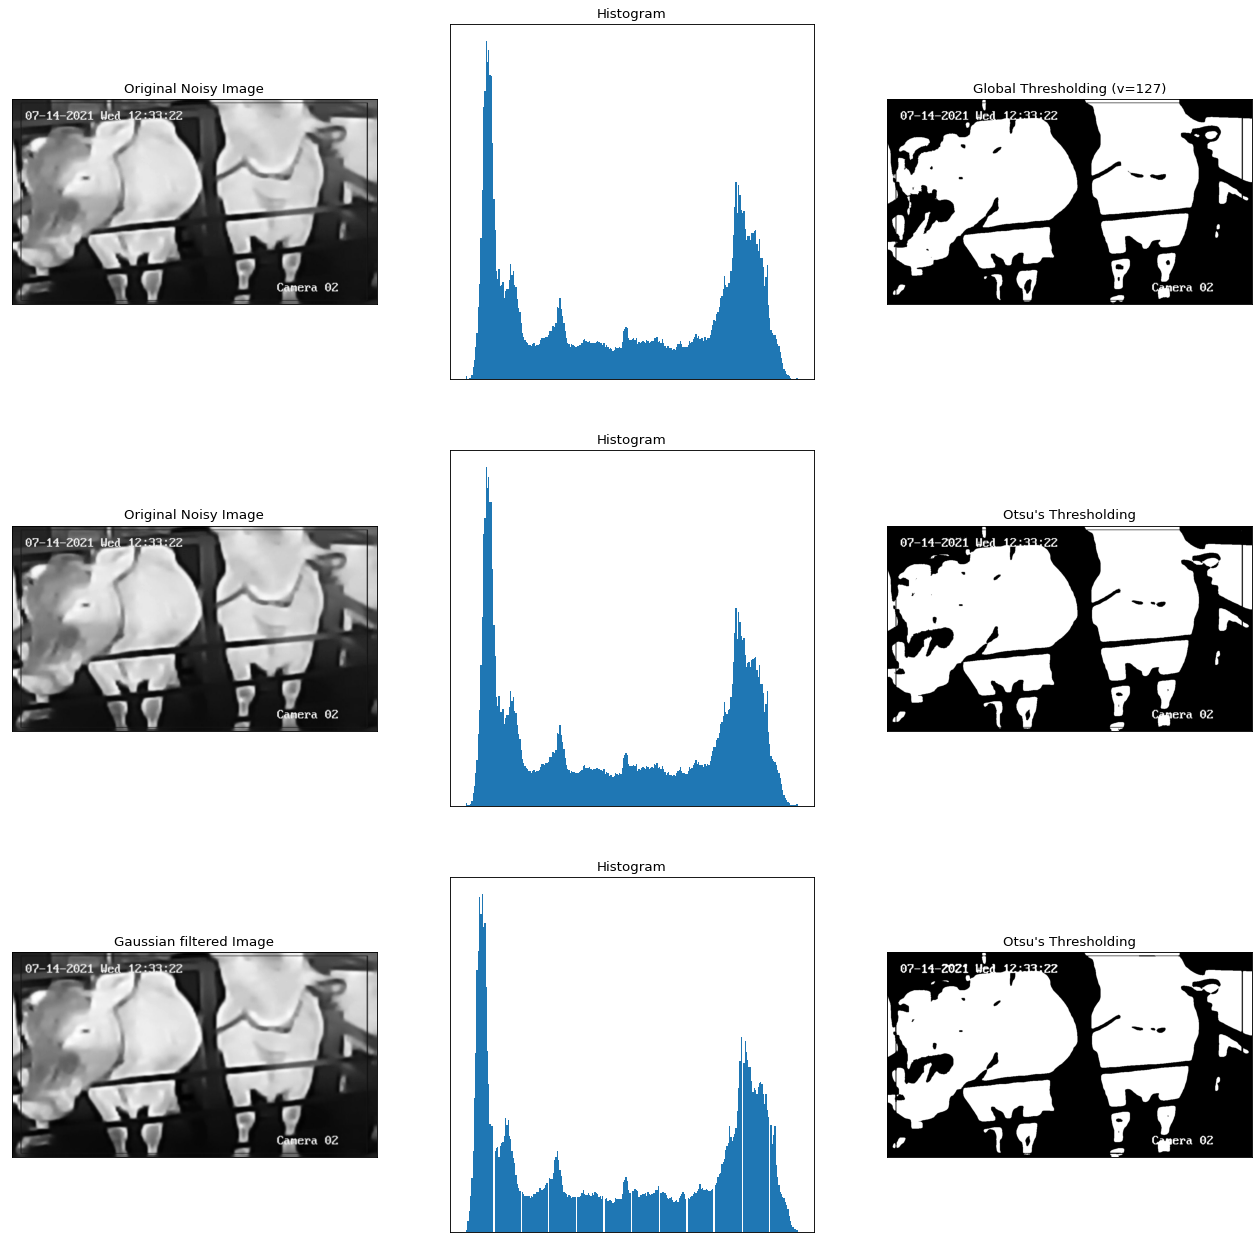

In [22]:
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(num=1, figsize=(20,20), dpi=80)
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

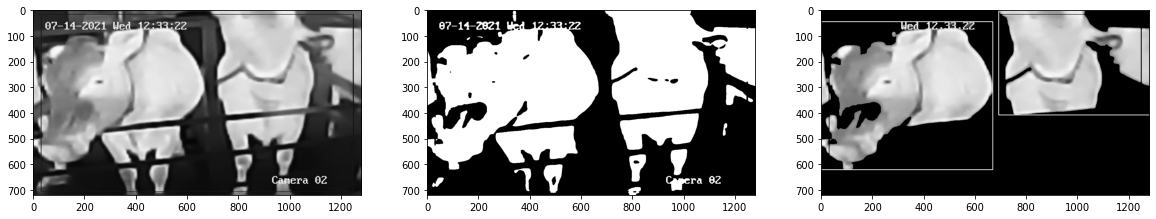

In [23]:
# Generate intermediate image; use morphological closing to keep parts of the brain together
inter = cv2.morphologyEx(th3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))

# Find largest contour in intermediate image
cnts, _ = cv2.findContours(inter, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = sorted(cnts, key=lambda x: cv2.contourArea(x), reverse=True)
cnt = cnts[0]
cnt2 = cnts[1]

# Output
out = np.zeros(img.shape, np.uint8)
cv2.drawContours(out, [cnt, cnt2], -1, 255, cv2.FILLED)
out = cv2.bitwise_and(img, out)

# Draw bounding boxes for 2 largest contours
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(out,(x,y),(x+w,y+h),(255,255,255),2)
x,y,w,h = cv2.boundingRect(cnt2)
cv2.rectangle(out,(x,y),(x+w,y+h),(255,255,255),2)

# Show original image, Otsu binary image, and 2 largest areas of foreground
plt.figure(num=1, figsize=(20,20))
plt.subplot(1,3,1),plt.imshow(img,'gray')
plt.subplot(1,3,2),plt.imshow(inter,'gray')
plt.subplot(1,3,3),plt.imshow(out,'gray')
plt.show()

192.168.88.175_02_20210714123311462.jpg


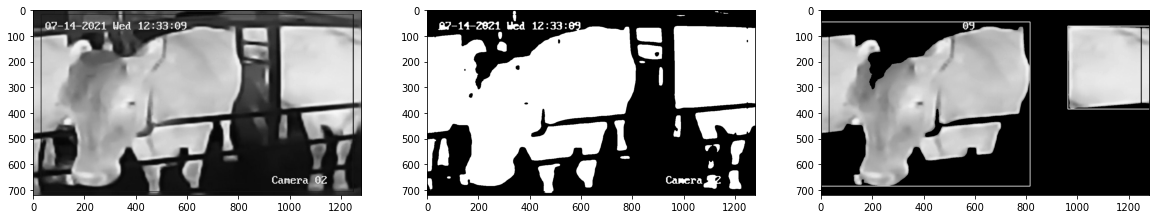

192.168.88.175_02_20210714123319689.jpg


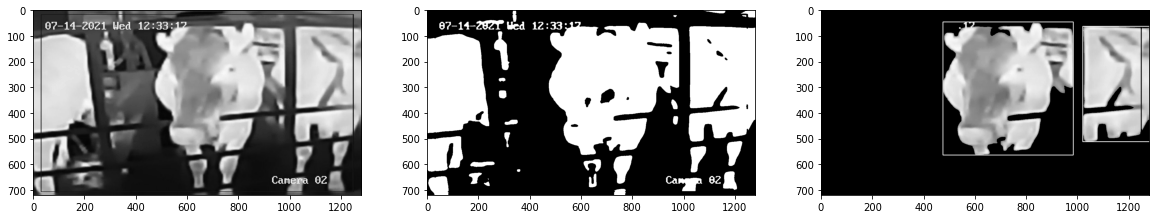

192.168.88.175_02_2021071412332314.jpg


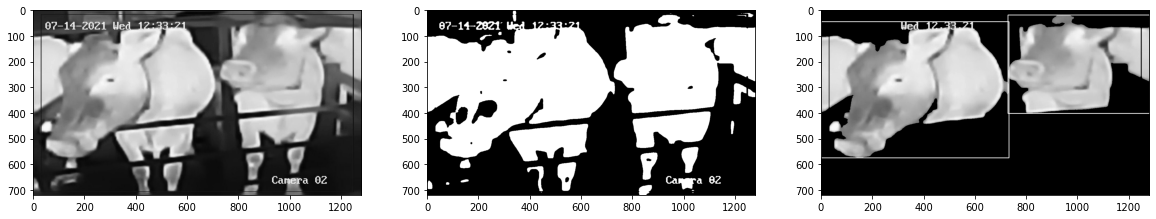

192.168.88.175_02_20210714123312476.jpg


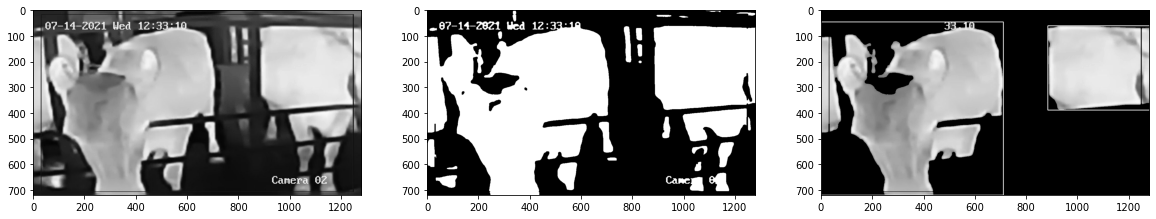

192.168.88.175_02_20210714123315654.jpg


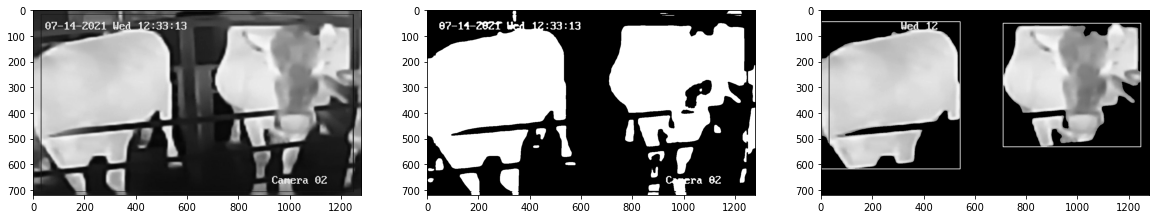

192.168.88.175_02_2021071412333210.jpg


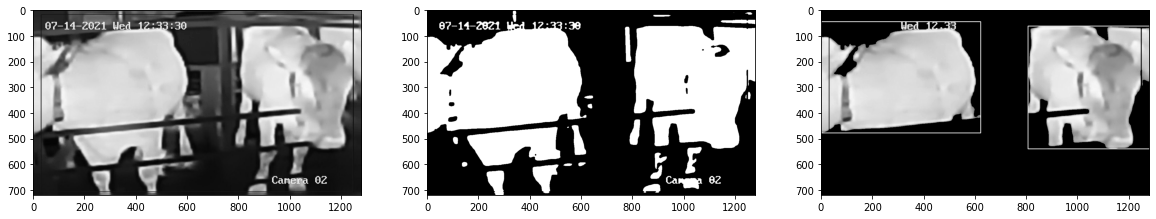

192.168.88.175_02_20210714123318164.jpg


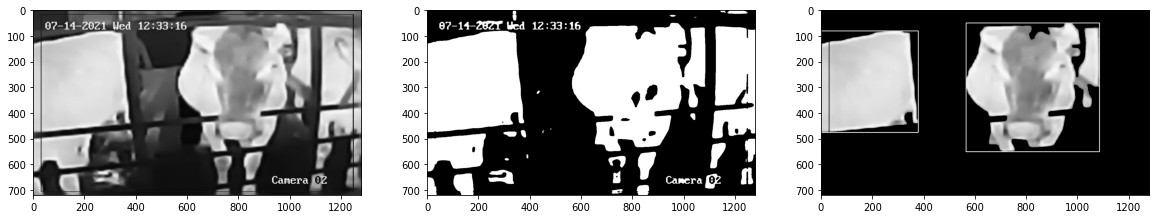

192.168.88.175_02_20210714123310662.jpg


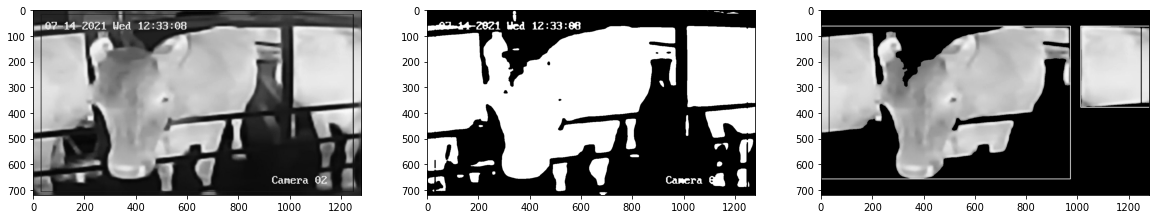

192.168.88.175_02_20210714123327392.jpg


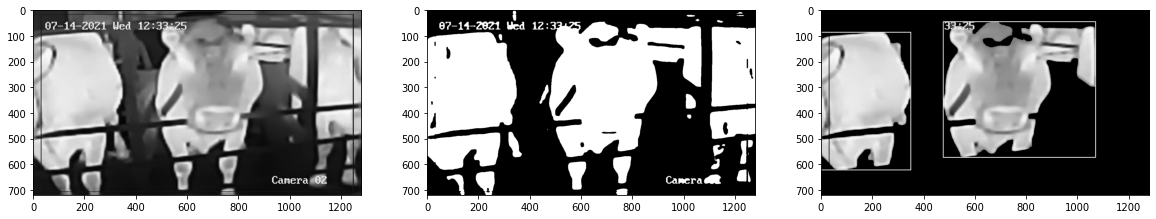

192.168.88.175_02_20210714123321747.jpg


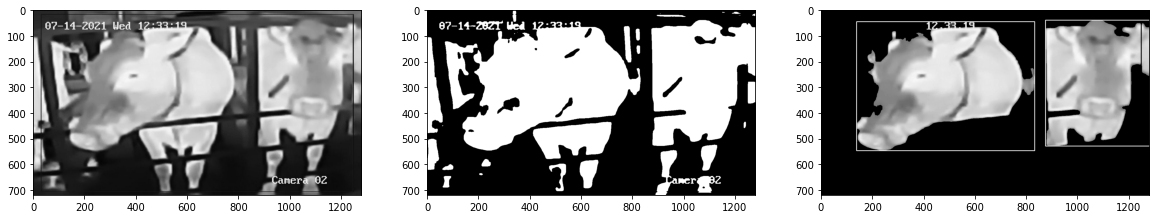

192.168.88.175_02_20210714123328993.jpg


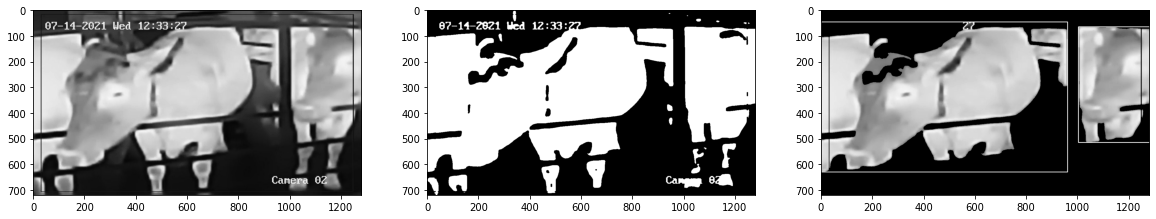

192.168.88.175_02_20210714123327929.jpg


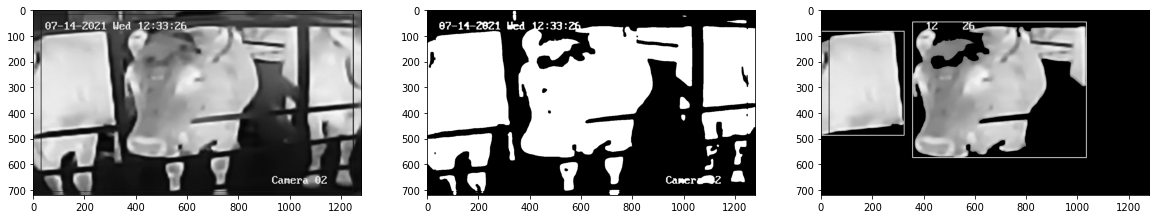

192.168.88.175_02_20210714123323768.jpg


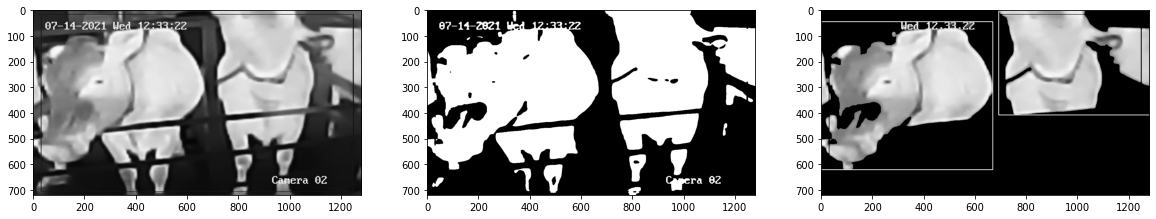

192.168.88.175_02_20210714123309966.jpg


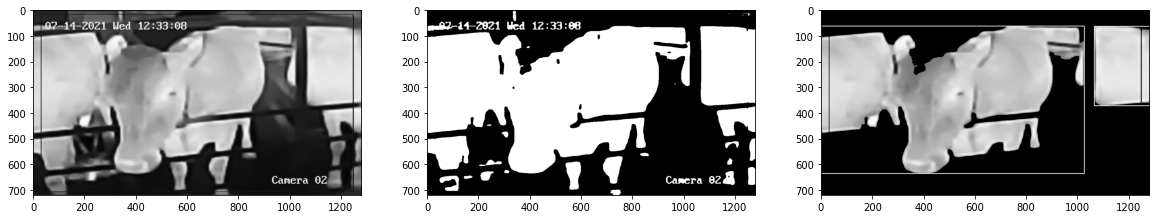

192.168.88.175_02_20210714123328567.jpg


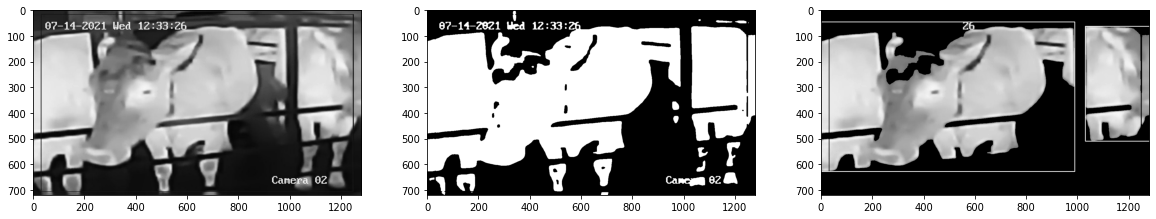

192.168.88.175_02_20210714123320850.jpg


Corrupt JPEG data: 2 extraneous bytes before marker 0xd9


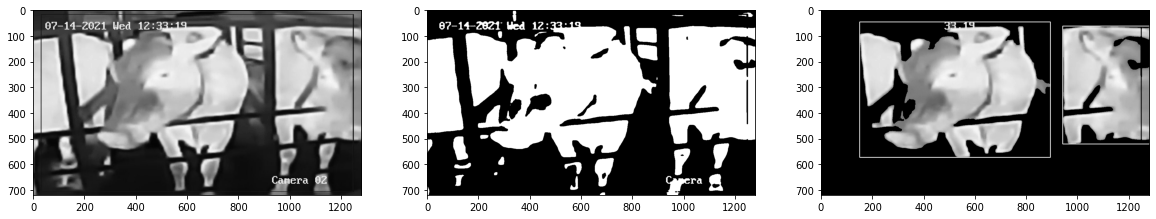

192.168.88.175_02_20210714123331785.jpg


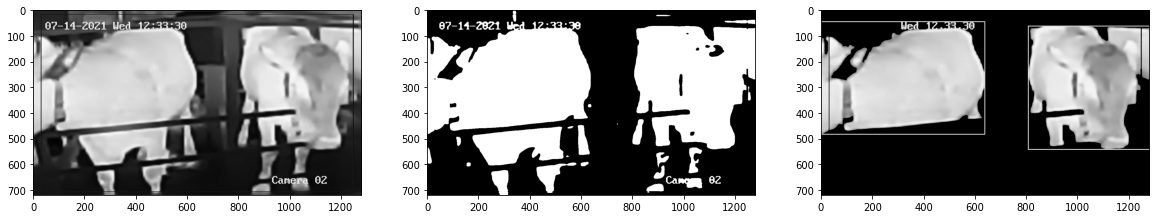

In [24]:
for file in os.listdir('data/otsu/thermal/greyscale'):
    print(file)
    img = cv2.imread(f'data/otsu/thermal/greyscale/{file}',0)
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Generate intermediate image; use morphological closing to keep parts of the brain together
    inter = cv2.morphologyEx(th, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))

    # Find 2 largest contours in intermediate image
    cnts, _ = cv2.findContours(inter, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cnts = sorted(cnts, key=lambda c: cv2.contourArea(c), reverse=True)
    cnt = cnts[0]
    cnt2 = cnts[1]

    # Output
    out = np.zeros(img.shape, np.uint8)
    cv2.drawContours(out, [cnt, cnt2], -1, 255, cv2.FILLED)
    out = cv2.bitwise_and(img, out)

    # Draw bounding boxes for 2 largest contours
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(out,(x,y),(x+w,y+h),(255,255,255),2)
    x,y,w,h = cv2.boundingRect(cnt2)
    cv2.rectangle(out,(x,y),(x+w,y+h),(255,255,255),2)

    # Show original image, Otsu binary image, and 2 largest areas of foreground
    plt.figure(num=1, figsize=(20,20))
    plt.subplot(1,3,1),plt.imshow(img,'gray')
    plt.subplot(1,3,2),plt.imshow(inter,'gray')
    plt.subplot(1,3,3),plt.imshow(out,'gray')
    plt.show()

    # Write
    cv2.imwrite(f'temp/{file}', out)